In [3]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv('coaster_db.csv')
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2

# Step 1: Check basic information:
1. How many columns, rows, what are those columns?
2. Is there any null, dupplicate 
3. data type
4. describe data

df.shape
df.columns
df.dtypes
df.describe()
df.isna().sum()
df.duplicated

df.to_datetime(df[''])
df.to_numeric(df[''])
df.drop([''], axis=1)
df.rename(columns = {'':''})
df.loc[df.duplicated()]
df.duplicated(subset = [''])
df.query('Coaster_Name == "Crystal Beach Cyclone"')
df = df.loc[~df.duplicated(subset = ['Coaster_Name','Opening_Date_Clean','Location'])] \
    .reset_index(drop = True).copy()

or df.drop_duplicates()
df.drop_duplicates(subset=['brand'])
df.drop_duplicates(subset=['brand', 'style'], keep='last') to remove duplicates and keep last occurrences

In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [7]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [38]:
#remove columns that we decided we don't want to keep:
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date','Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #'Track layout', 'Fastrack available', 'Soft opening date.1',
    #'Closing date', 'Opened', 'Replaced by', 'Website',
    #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #'Single rider line available', 'Restraint Style',
    #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
    #'latitude', 'longitude', 
         'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'Type_Main', 'opening_date_clean', 'speed_mph', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [39]:
df = df.rename(columns = {'coaster_name':'Coaster_Name',
                         'year_introduced':'Year_Introduced',
                         'opening_date_clean':'Opening_Date_Clean',
                         'speed_mph':'Speed_mph',
                         'height_ft':'Height_ft',
                         'Inversions_clean':'Inversions_Clean',
                         'Gforce_clean':'Gforce_Clean'})

In [40]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
Type_Main               0
Opening_Date_Clean    250
Speed_mph             150
Height_ft             916
Inversions_Clean        0
Gforce_Clean          725
dtype: int64

In [12]:
df.shape

(1087, 10)

In [41]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean


In [16]:
df.loc[df.duplicated(subset = ['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaT,53.0,NaN,3,4.7


In [19]:
#because it's hard to identify why it's duplicated and whether we should exclude any data, let's filter to get a specific case
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,1926-01-01,60.0,NaN,0,4.0


In [42]:
#remove duplicated cases by specific field

df = df.loc[~df.duplicated(subset = ['Coaster_Name','Opening_Date_Clean','Location'])] \
    .reset_index(drop = True).copy()

# Step 2: Understand feature
Plot:
Hist
KDE
Boxplot

df.plot(kind = '', title = '')

df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top 10 Years Coasters Introduced')
    
sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)
sns.pairplot()

df_corr = df[['Year_Introduced','Speed_mph','Height_ft','Inversions_Clean','Gforce_Clean']].dropna().corr()
sns.heatmap(df_corr, annot = True)

Text(0, 0.5, 'Count')

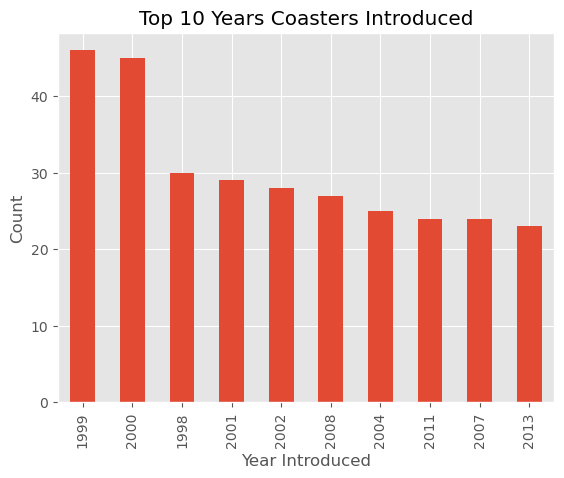

In [26]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

<AxesSubplot:title={'center':'Coaster Speed (mqh)'}, ylabel='Frequency'>

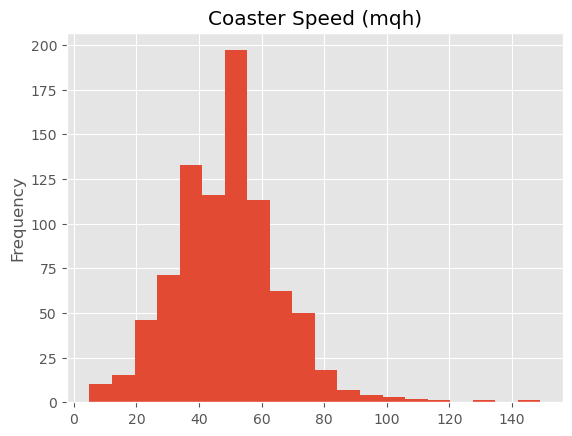

In [28]:
df['Speed_mph'].plot(kind = 'hist', 
                     bins = 20, 
                     title = 'Coaster Speed (mqh)')

<Figure size 1500x2800 with 0 Axes>

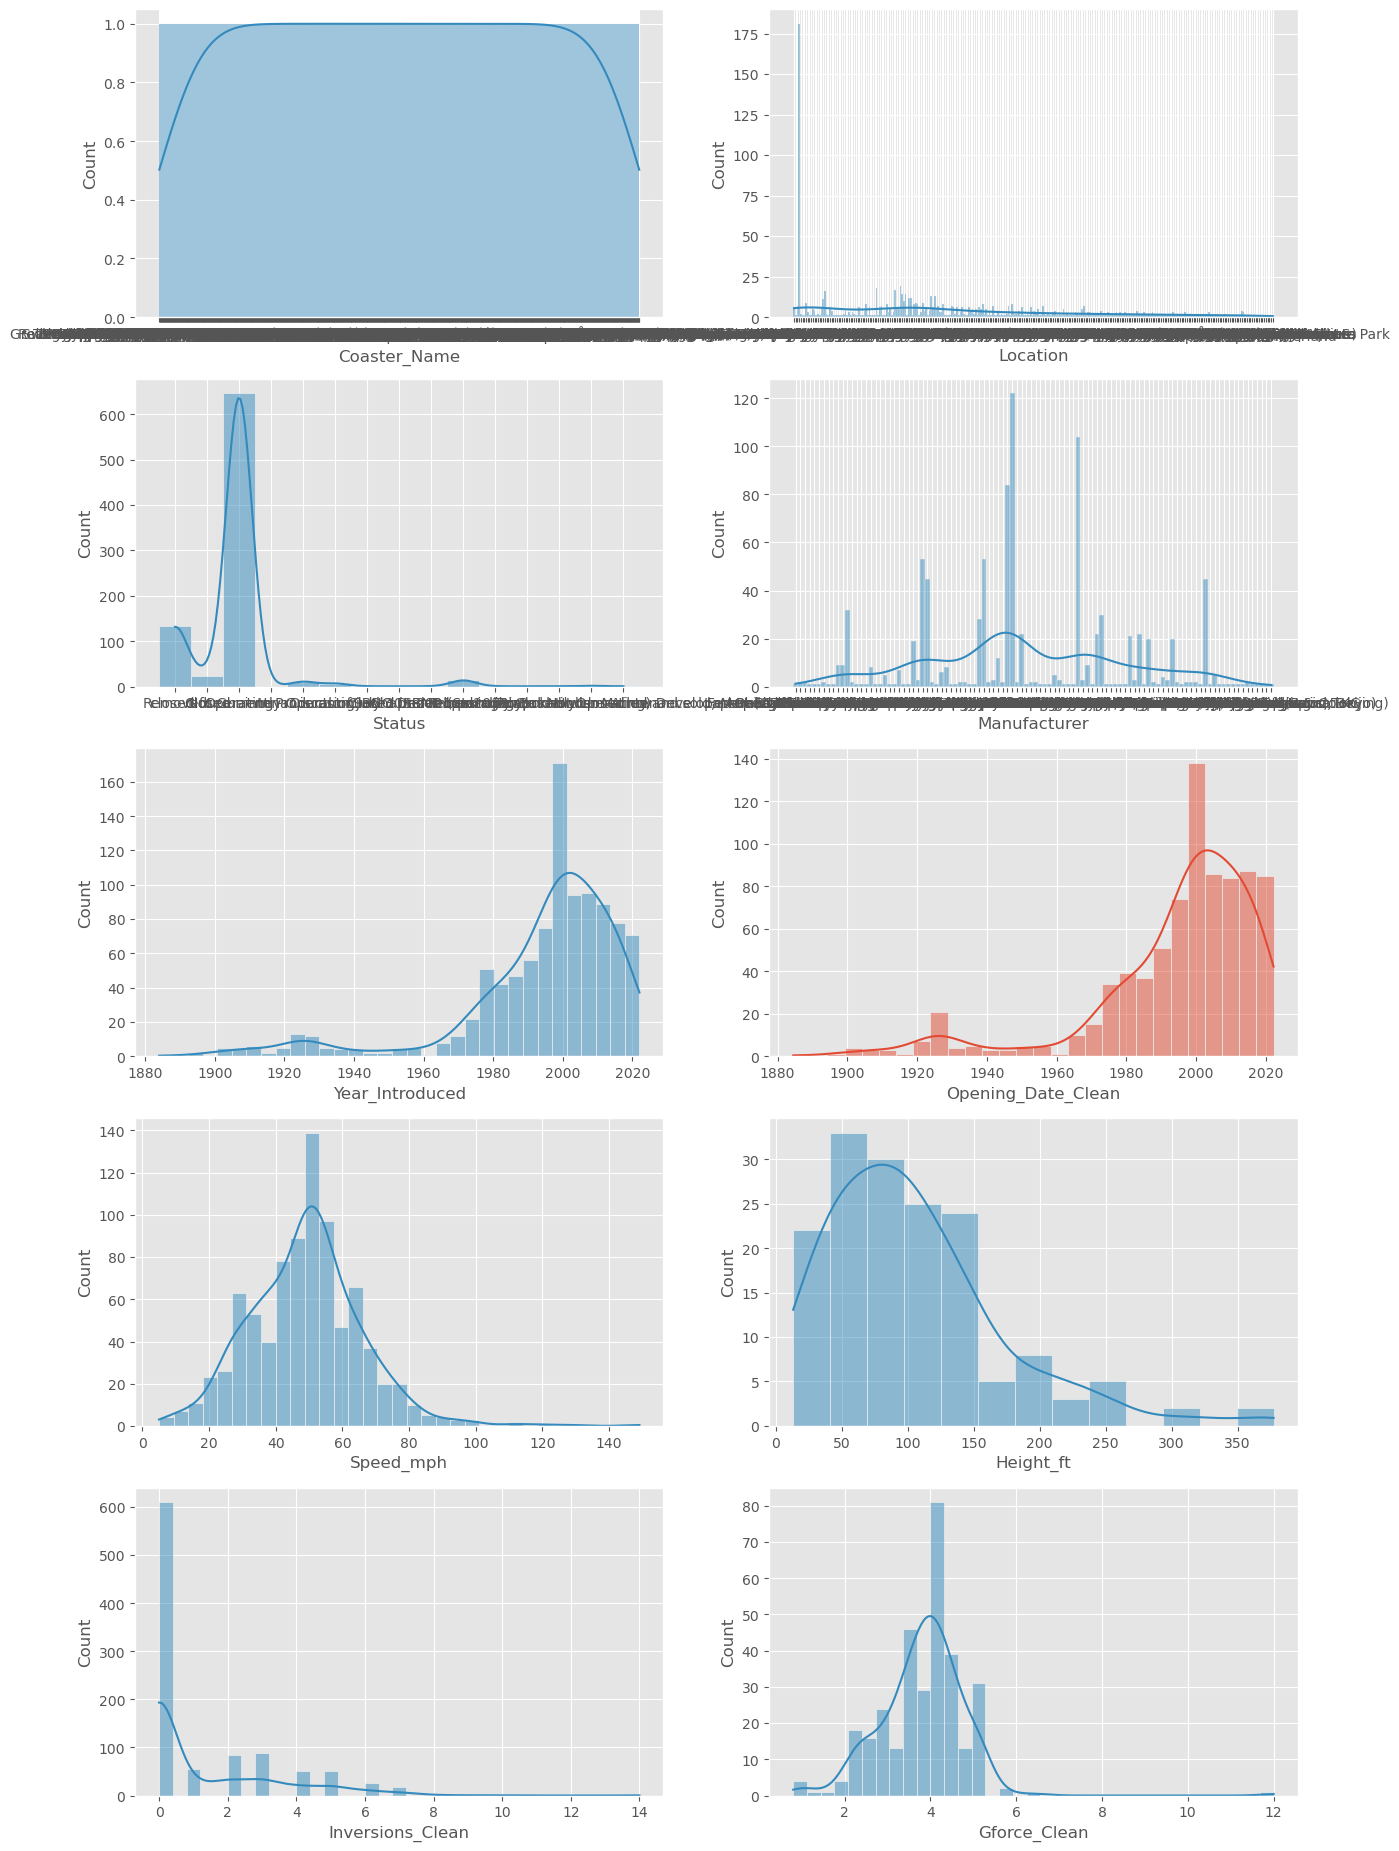

In [30]:
# Set the background color and figsize
plt.figure(figsize = (15, 28))

# Adjust subplot vertical spacing
plt.subplots_adjust(hspace = 0.2)

# 7x2 subplot figure
fig, axs = plt.subplots(5, 2, figsize = (15, 28))

i = 1
# Loop through dataframe columns
for feature in df.columns:
    # Create a subplot
    plt.subplot(6, 2, i)
    # Create histogram
    sns.histplot(data = df, x = feature, kde = True)
    i += 1
    
# Show the plot
plt.show()

# Feature Relationship
scatter plot
heatmap
pairplot
groupby

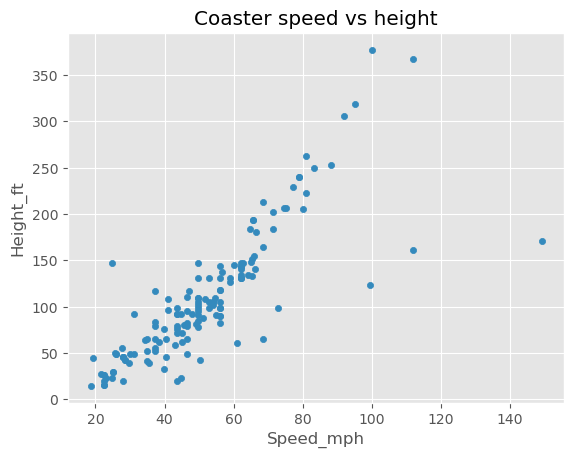

In [32]:
df.plot(kind = 'scatter',
       x='Speed_mph',
       y='Height_ft',
       title = 'Coaster speed vs height')
plt.show()

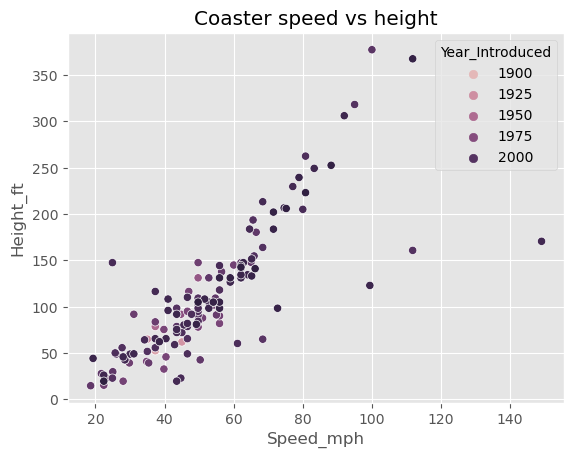

In [35]:
ax = sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster speed vs height')
plt.show()

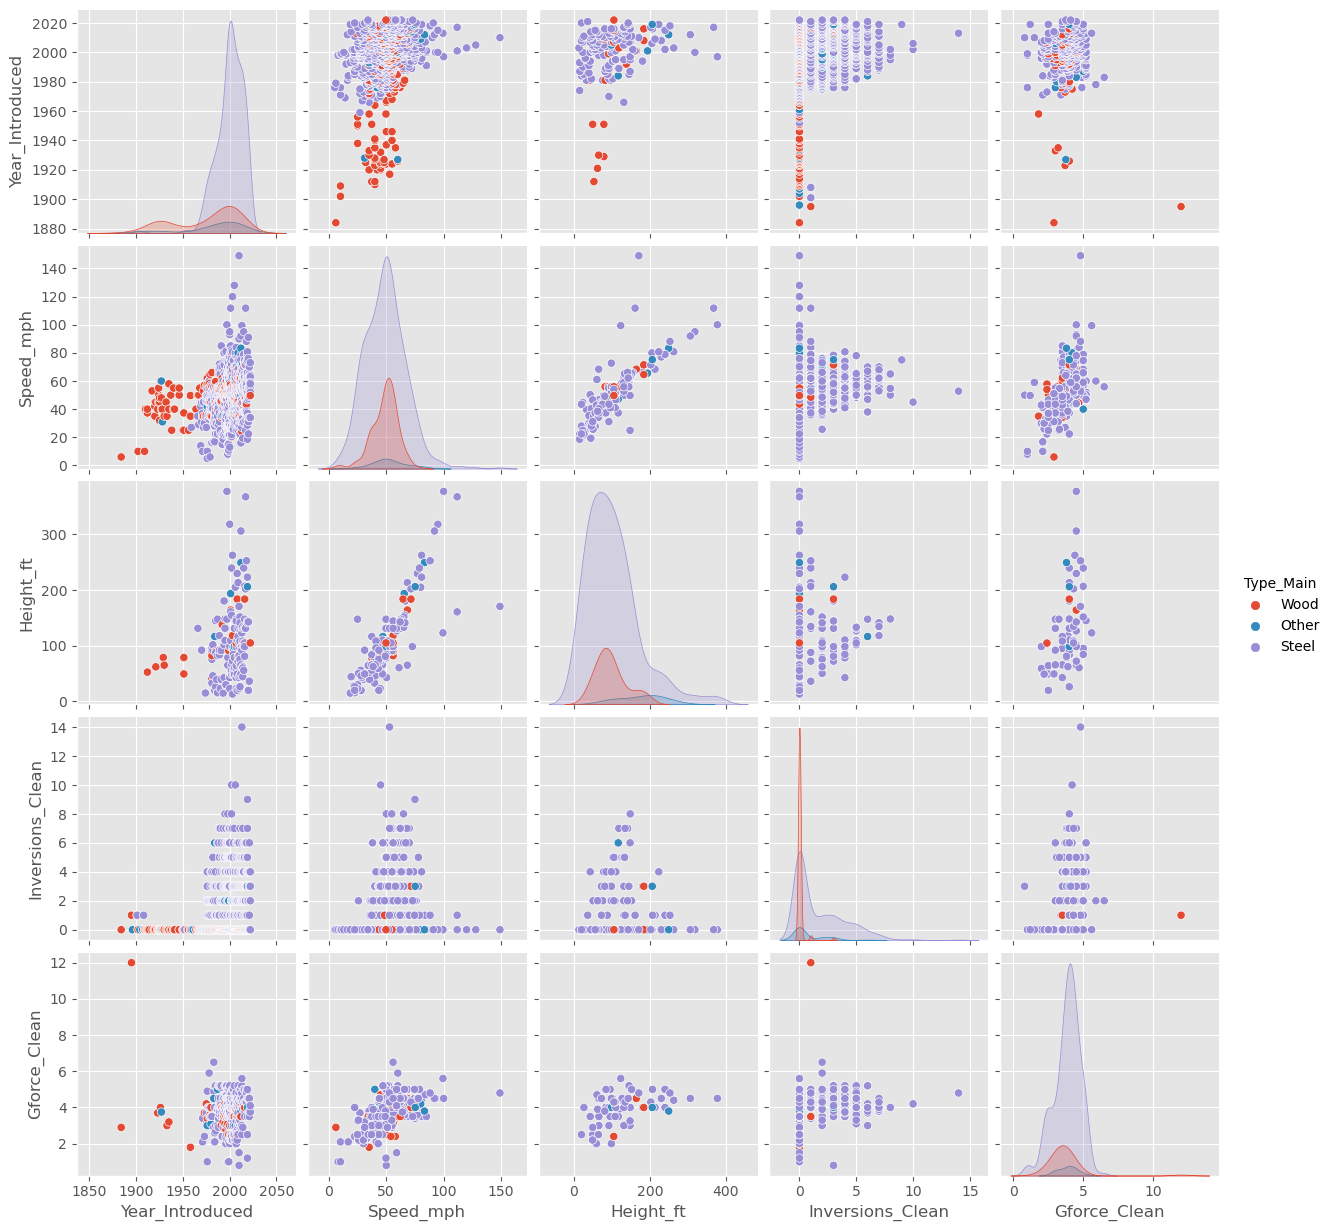

In [43]:
sns.pairplot(df,
            vars = ['Year_Introduced','Speed_mph','Height_ft','Inversions_Clean','Gforce_Clean'],
            hue = 'Type_Main')
plt.show()

In [46]:
#Corralation
df_corr = df[['Year_Introduced','Speed_mph','Height_ft','Inversions_Clean','Gforce_Clean']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_Clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_Clean,0.160247,0.607383,0.466482,0.275991,1.000000


<AxesSubplot:>

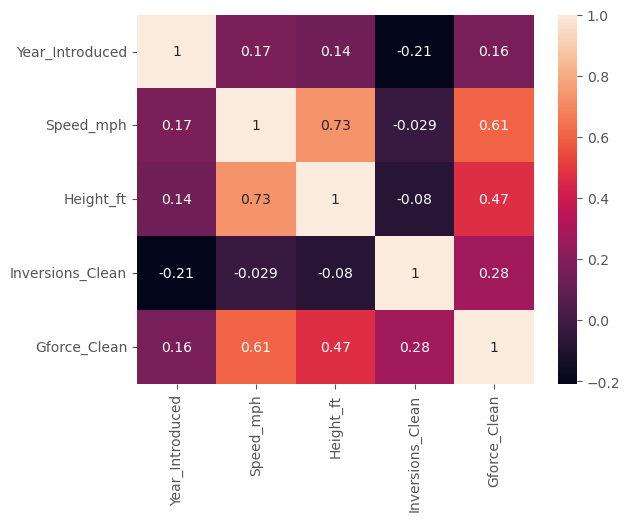

In [48]:
sns.heatmap(df_corr, annot = True)

# group by, aggregation

In [50]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [53]:
df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')

#we can plot above query by .plot(kind = 'barh')

,mean,count
Location,,
Alton Towers,42.791667,12
Carowinds,43.571429,14
Kings Island,49.273684,19
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Six Flags Great Adventure,53.036364,11
Canada's Wonderland,53.533333,12
Six Flags Magic Mountain,57.241176,17
Cedar Point,57.833333,18
